<a href="https://colab.research.google.com/github/georgebsmith-tech/schoolofAI-pmlcourse-pandas/blob/master/Exploratory_Data_Analysis(EDA)_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Session: Exploratory data analysis**

The first data set used is the titanic dataset.

In [0]:
import pandas as pd
data=pd.read_csv("train_titanic.csv")# reads in the data, which is a csv data

In [0]:
data.head()# displays the first five records of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.tail(2)# displays the last two records of the data. Not specifying would return the last five

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
data.sample(10)# samples the data and randomly picks 10 records, as specified.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S


In [0]:
data.info()# gives some metadata(information) about the data.Theire data tyoe, the number of missing values in each column and the total memory occupied

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
data.shape # This gives another meta information. Precisely, the number of rows and the number of columns

(891, 12)

In [0]:
data.memory_usage() # Displays the memory occupied by each column

Index           128
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
dtype: int64

In [0]:
data.memory_usage(deep=True) # Query more into the memory occupied, hence giving the true memory occupied by each column, especially those with data type of object

Index            128
PassengerId     7128
Survived        7128
Pclass          7128
Name           74813
Sex            54979
Age             7128
SibSp           7128
Parch           7128
Ticket         56802
Fare            7128
Cabin          34376
Embarked       58738
dtype: int64

In [0]:
data["Embarked"].nunique()# determines how many unique values are in the Embarke column

3

In [0]:
data["Embarked"]=data["Embarked"].astype("category")# since there are few unique values , the data type of the column is changed from object to category

In [0]:
data.memory_usage(deep=True)

Index            128
PassengerId     7128
Survived        7128
Pclass          7128
Name           74813
Sex            54979
Age             7128
SibSp           7128
Parch           7128
Ticket         56802
Fare            7128
Cabin          34376
Embarked        1169
dtype: int64

In [0]:
data["Pclass"].nunique()

3

In [0]:
data["Pclass"]=data["Pclass"].astype("int8")

In [0]:
data.memory_usage()

Index           128
PassengerId    7128
Survived       7128
Pclass          891
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked        995
dtype: int64

In [0]:
data.describe() # Gives some univariate statistics of the data set
# This is done for only the columns with data type of int and float

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
data.describe(include=["object"]) # Gives the univariate statistics for the columns with data type of object

,Name,Sex,Ticket,Cabin
count,891,891,891,204
unique,891,2,681,147
top,"Bengtsson, Mr. John Viktor",male,CA. 2343,C23 C25 C27
freq,1,577,7,4


## Working with and handling missing values

In [0]:
data.isna() # Determines the cells with missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
data.isna().sum() # gives a count of the number of missing values that exists in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
data.dropna(how="all") # drops records where all the values are missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
data.dropna() # Works with the default parameter, by dropping any record that has a missing value( using any="how")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Using how="any" dropped a lot of the data, hence may not be a good aproach to be used.

In [0]:
83/891 # percentage left after dropping records with missing value(s)

0.2053872053872054

In [0]:
data.dropna(subset=["Name","Sex","Age"]) # specifies where to look for missing values, and work or drop based on that

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
data.dropna(subset=["Name","Sex","Age"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
data.shape # Since in the above operations, we didnt specify the parameter inplace=True, all values remains the same

(891, 12)

In [0]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
data_age_filled=data.Age.fillna(value=data.Age.mean()) # Fills all missing values in the age column with the mean of the ages

In [0]:
data.Age.isna().sum() # Shows that the operation does not modify the column

177

In [0]:
data_age_filled.isna().sum() # Shows that the operation is stored in this variable, since it was binded to it

0

In [0]:
data_age_filled_1=data.Age.fillna(method="ffill") # Using an automatic method of filling, which in this case id forward fill(ffill). There is also backward fill(bfill) and the rest

In [0]:
data_age_filled_1.isna().sum()

0

## Sorting of data

In [0]:
data1=pd.read_csv("drinksbycountry.csv") # using another data set. Drinks by country

In [0]:
data1.sample(12)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
116,116,Myanmar,5,1,0,0.1,Asia
190,190,Yemen,6,0,0,0.1,Asia
84,84,Jamaica,82,97,9,3.4,North America
63,63,Gambia,8,0,1,2.4,Africa
0,0,Afghanistan,0,0,0,0.0,Asia
86,86,Jordan,6,21,1,0.5,Asia
161,161,Sri Lanka,16,104,0,2.2,Asia
89,89,Kiribati,21,34,1,1.0,Oceania
24,24,Brunei,31,2,1,0.6,Asia
28,28,Cote d'Ivoire,37,1,7,4.0,Africa


In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
Unnamed: 0                      193 non-null int64
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [0]:
data1.memory_usage()

Index                            128
Unnamed: 0                      1544
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [0]:
data1.continent.nunique()

6

In [0]:
data1.continent=data1.continent.astype("category")

In [0]:
data1.memory_usage()

Index                            128
Unnamed: 0                      1544
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                        401
dtype: int64

In [0]:
data1.nlargest(10,"total_litres_of_pure_alcohol")# displays the first 10 records with the largest values in the "total_litres_of_pure_alcohol" column

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,15,Belarus,142,373,42,14.4,Europe
98,98,Lithuania,343,244,56,12.9,Europe
3,3,Andorra,245,138,312,12.4,Europe
68,68,Grenada,199,438,28,11.9,North America
45,45,Czech Republic,361,170,134,11.8,Europe
61,61,France,127,151,370,11.8,Europe
141,141,Russian Federation,247,326,73,11.5,Asia
81,81,Ireland,313,118,165,11.4,Europe
99,99,Luxembourg,236,133,271,11.4,Europe
155,155,Slovakia,196,293,116,11.4,Europe


In [0]:
#The code below displays the records with the least amount of "beer_servings" out of the top 10 with the highest total_litres_of_pure_alcohol 
data1.nlargest(10,"total_litres_of_pure_alcohol").nsmallest(5,"beer_servings")

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,61,France,127,151,370,11.8,Europe
15,15,Belarus,142,373,42,14.4,Europe
155,155,Slovakia,196,293,116,11.4,Europe
68,68,Grenada,199,438,28,11.9,North America
99,99,Luxembourg,236,133,271,11.4,Europe


In [0]:
data1.drop(["Unnamed: 0"],axis=1) # drops the column with the name specified as argument

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [0]:
data1=data1.drop(["Unnamed: 0"],axis=1).set_index(["country"]) # performs method chaining by dropping the column as specified, then making the country column to be the index

In [0]:
data1.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [0]:
data1.corr() # Checks the correlation coefficient amongst the coluns. The matrix prooduced is called a dispersion matrix or covariance matrix

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


## Second session. Data preprocessing with the titanic data set

### Titanic data set

In [0]:
data.sample(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.00,0,0,248731,13.5000,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.50,0,0,364499,8.0500,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C
441,442,0,3,"Hampe, Mr. Leon",male,20.00,0,0,345769,9.5000,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.00,0,0,250655,26.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


In [0]:
data.drop(["Name","PassengerId"],axis=1,inplace=True) # drpos two columns, as specified and using the inplace parameter to modify the original data set

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int8
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null category
dtypes: category(1), float64(2), int64(3), int8(1), object(3)
memory usage: 57.7+ KB


In [0]:
data.Sex=data.Sex.map({"male":1,"female":0}) # USing the .map method to change the values in the Sex column to numerical values. There are other method that can also be used

In [0]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [0]:
data.Embarked.isna().sum()

2

In [0]:
data.Age=data.Age.fillna(method="ffill")

In [0]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [0]:
data.Age=data.Age.apply(int) # transforms all values in the Age column to integer values. Any function that should be used in the apply methodd must accept only one argument

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int8
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null category
dtypes: category(1), float64(1), int64(5), int8(1), object(2)
memory usage: 57.7+ KB


In [0]:
# In the next cell, a custom function is created to be used with the apply method in performing the mapping below
S=>Q
C=>T

In [0]:
def transform(item):
  if item=="S":
    return "Q"
  elif item=="C":
    return "T"

In [0]:
transform("C")# a test to confirm if it gives the appropriate result

'T'

In [0]:
data.Embarked.apply(transform)

0         Q
1         T
2         Q
3         Q
4         Q
       ... 
886       Q
887       Q
888       Q
889       T
890    None
Name: Embarked, Length: 891, dtype: object

In [0]:
data.describe().T # describes, then transposes the data set

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.0,0.0000,1.0000,1.0,1.0000
Age,891.0,29.561167,14.567604,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [0]:
data.Age.median() # obtains the median of the data set

28.0

In [0]:
data.Age.cumsum() # gets the cumulative sum of the Age column

0         22
1         60
2         86
3        121
4        156
       ...  
886    26243
887    26262
888    26281
889    26307
890    26339
Name: Age, Length: 891, dtype: int64

In [0]:
data["CumAge"]=data.Age.cumsum() # creates a new column, labeled CumAge

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CumAge
0,0,3,1,22,1,0,A/5 21171,7.2500,NaN,S,22
1,1,1,0,38,1,0,PC 17599,71.2833,C85,C,60
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,86
3,1,1,0,35,1,0,113803,53.1000,C123,S,121
4,0,3,1,35,0,0,373450,8.0500,NaN,S,156


In [0]:
data.Age.min() # obtain th minimum of the Age column 

0

In [0]:
data.Age.max() # Obtain the maximum of the Age column

80

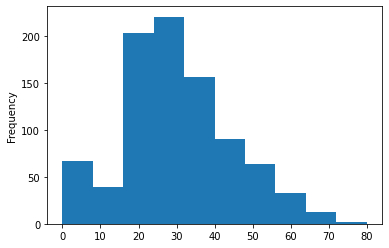

In [0]:
data.Age.plot(kind="hist") # usng pandas to plot a histogram

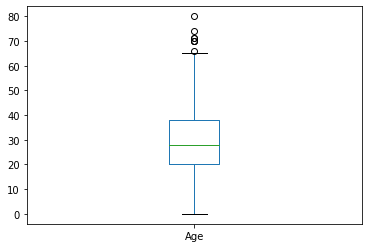

In [0]:
data.Age.plot(kind="box") # using pandas to plot a boxplot in order to identify outliers

In [0]:
data["ScaledAge"]=data.Age/data.Age.max() # standardizing the data set by diving each value in the Gae column by the maximum of the Ages. This gives values within 0 and 1 inclusive

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CumAge,ScaledAge
0,0,3,1,22,1,0,A/5 21171,7.2500,NaN,S,22,0.2750
1,1,1,0,38,1,0,PC 17599,71.2833,C85,C,60,0.4750
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,86,0.3250
3,1,1,0,35,1,0,113803,53.1000,C123,S,121,0.4375
4,0,3,1,35,0,0,373450,8.0500,NaN,S,156,0.4375


In [0]:
data.ScaledAge.min()

0.0

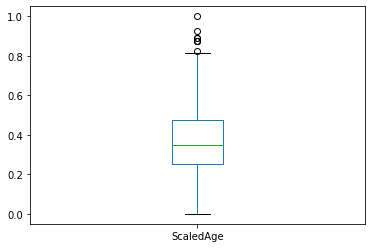

In [0]:
data.ScaledAge.plot(kind="box")

In [0]:
These are other formulae that can be used to scale or standardize a numerical column before feeding it to a machine learning algorithm
(data-min)/(max-min)
(data-mean)/std
data/(max-min)

In [0]:
data1

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [0]:
data1[data1.continent=="Asia"] # Selects data, based on criteria. 

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Bahrain,42,63,7,2.0,Asia
Bangladesh,0,0,0,0.0,Asia
Bhutan,23,0,0,0.4,Asia
Brunei,31,2,1,0.6,Asia
Cambodia,57,65,1,2.2,Asia
China,79,192,8,5.0,Asia
North Korea,0,0,0,0.0,Asia
India,9,114,0,2.2,Asia


In [0]:
data1[(data1.continent=="Africa") | (data1.beer_servings>100)]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
Antigua & Barbuda,102,128,45,4.9,North America
Argentina,193,25,221,8.3,South America
...,...,...,...,...,...
Uruguay,115,35,220,6.6,South America
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
